In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.set_option('display.max_columns',130)
pd.set_option('display.max_rows', 500)


In [120]:
inp= pd.read_csv(r"C:\Users\Rohit Thanvi\Desktop\telco_churn.csv")

In [121]:
inp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
inp.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [123]:
inp["TotalCharges"]=pd.to_numeric(inp.TotalCharges,errors= "coerce")

<AxesSubplot:>

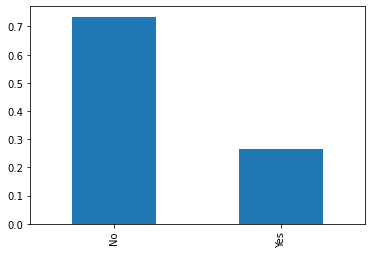

In [124]:
inp.Churn.value_counts(normalize=True).plot.bar()

In [125]:
inp0= inp[inp["Churn"]=="No"]
inp1= inp[inp["Churn"]=="Yes"]

In [126]:
inp0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

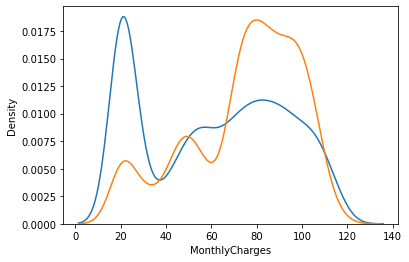

In [127]:
sns.distplot(inp0["MonthlyCharges"],hist=False,label="Churn")
sns.distplot(inp1["MonthlyCharges"],hist=False,label="NoN- Churn")

<AxesSubplot:xlabel='Contract', ylabel='count'>

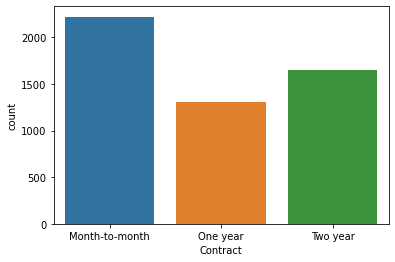

In [128]:
sns.countplot(x= "Contract",data= inp0)

<AxesSubplot:xlabel='Contract', ylabel='count'>

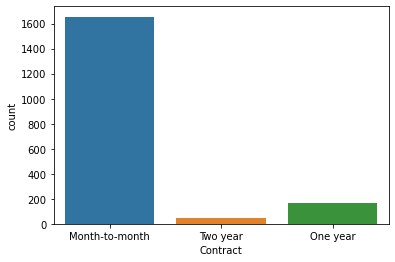

In [129]:
sns.countplot(x= "Contract",data= inp1)

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

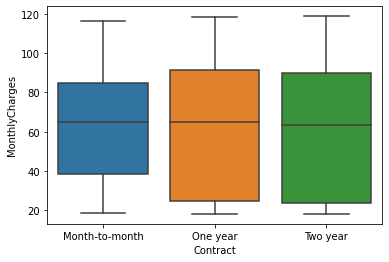

In [130]:
sns.boxplot(x= "Contract",y= "MonthlyCharges",data= inp0)

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

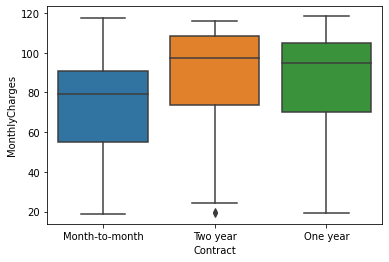

In [131]:
sns.boxplot(x= "Contract",y= "MonthlyCharges",data= inp1)

<AxesSubplot:>

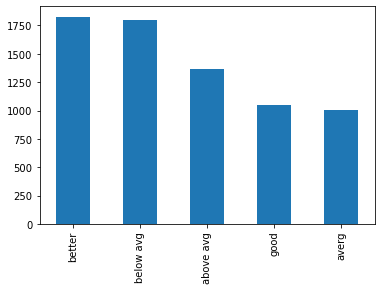

In [132]:
pd.cut(inp["MonthlyCharges"],bins=5,labels=["below avg","averg","above avg","better","good"]).value_counts().plot(kind="bar")

In [133]:
inp.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [134]:
inp["Churn"].replace({"Yes": 1, "No": 0}, inplace=True)

       

In [136]:
numerical_analysis= ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]

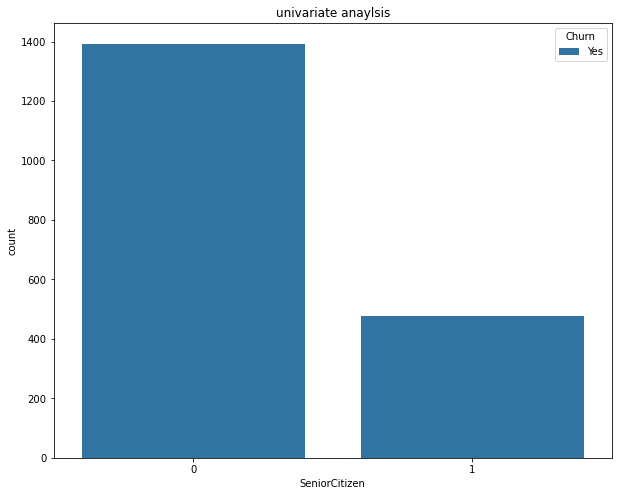

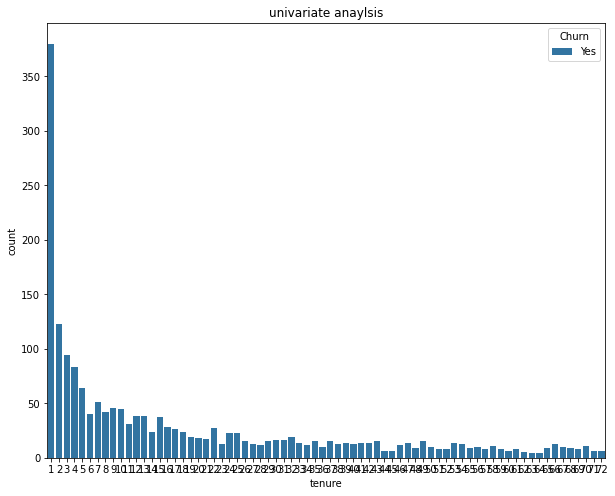

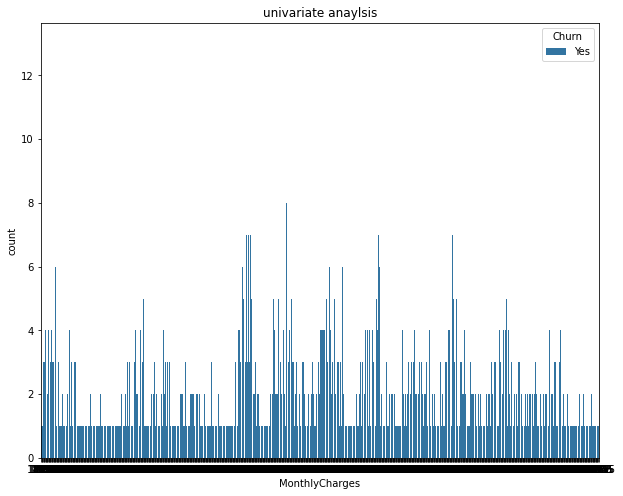

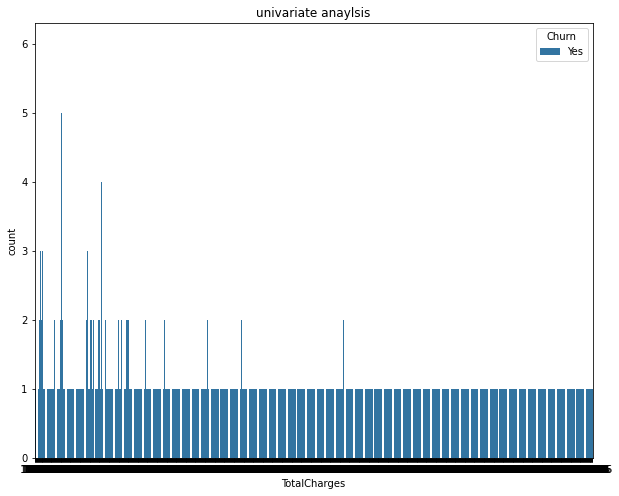

In [139]:
for i in numerical_analysis:
    plt.figure(figsize= (10,8))
    plt.title("univariate anaylsis")
    plt.xlabel(i)
    sns.countplot(i,hue= "Churn",data= inp1)
    plt.show()

In [157]:
categorical_analysis=['gender','PaperlessBilling','TechSupport','InternetService',
       'PhoneService', 'Dependents','StreamingTV','StreamingMovies','DeviceProtection','OnlineBackup','OnlineSecurity']
inp1["Churn"].replace({"Yes": 1, "No": 0}, inplace=True)

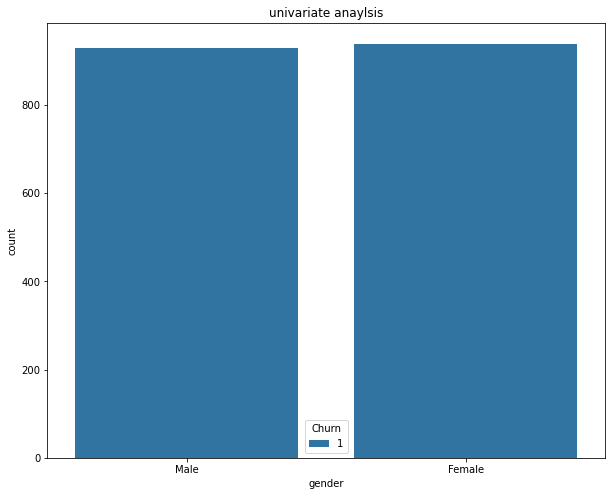

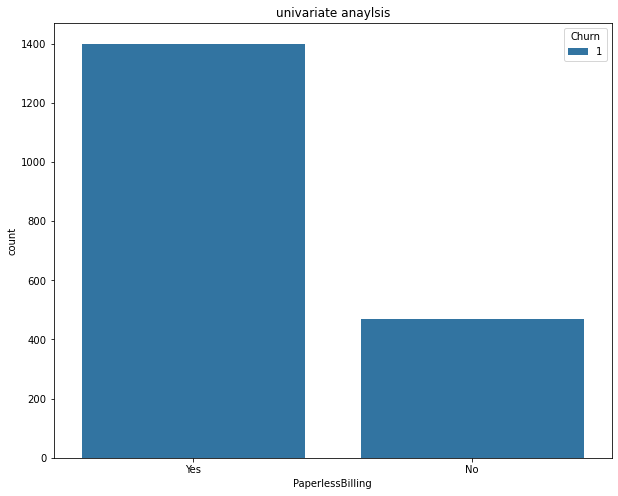

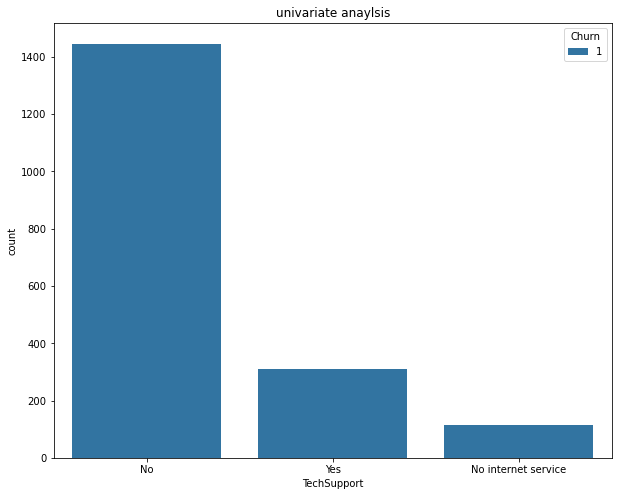

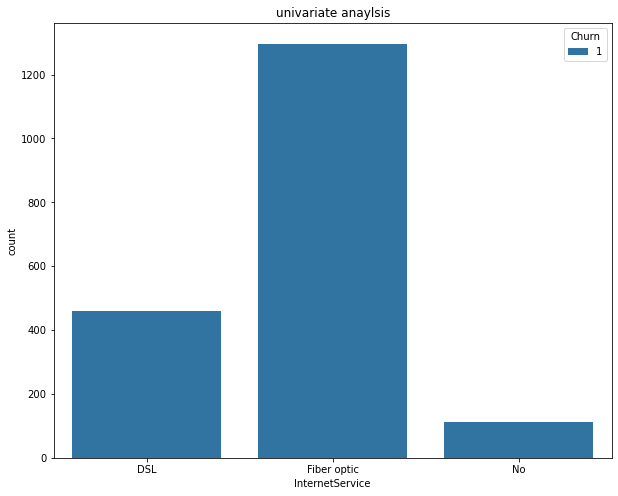

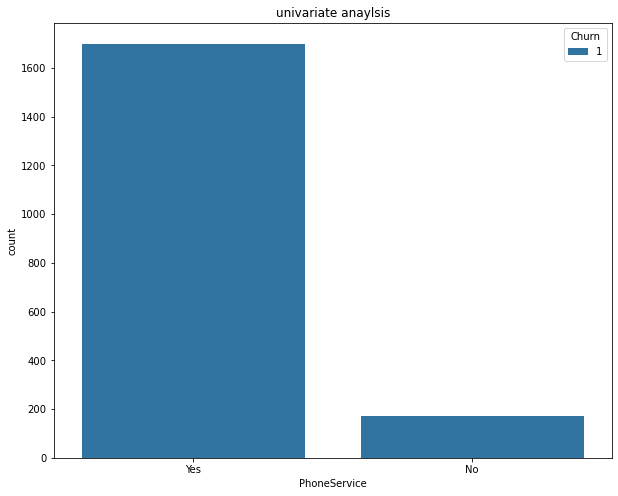

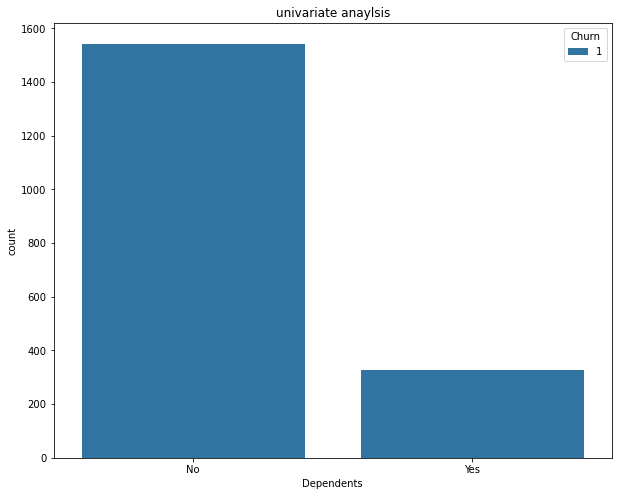

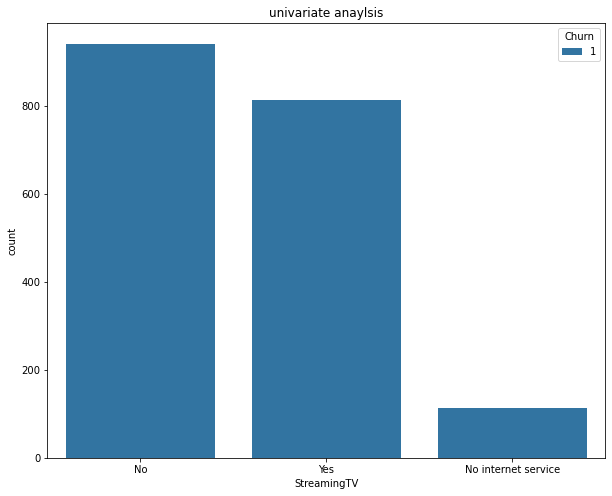

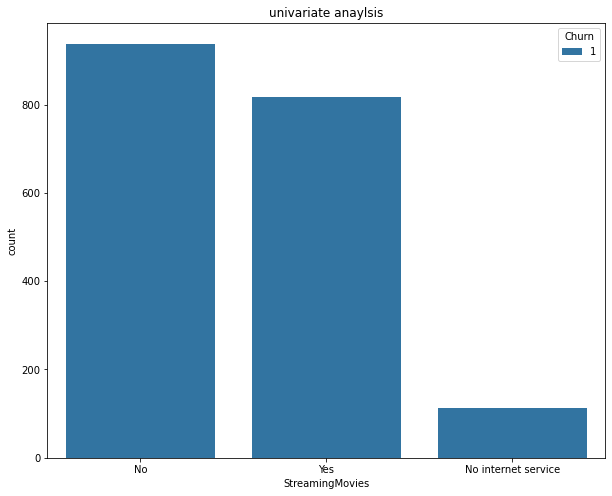

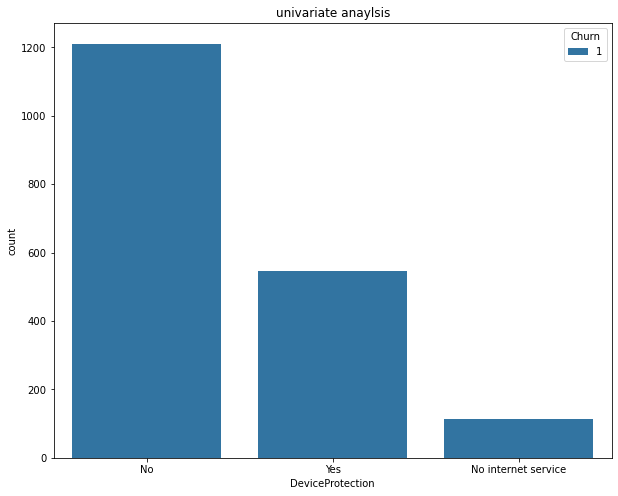

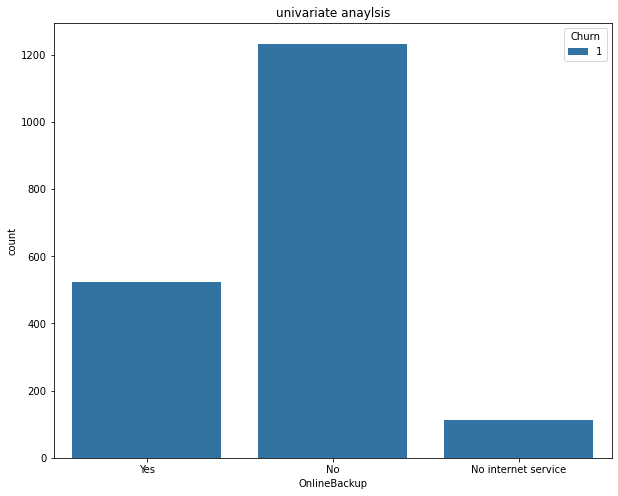

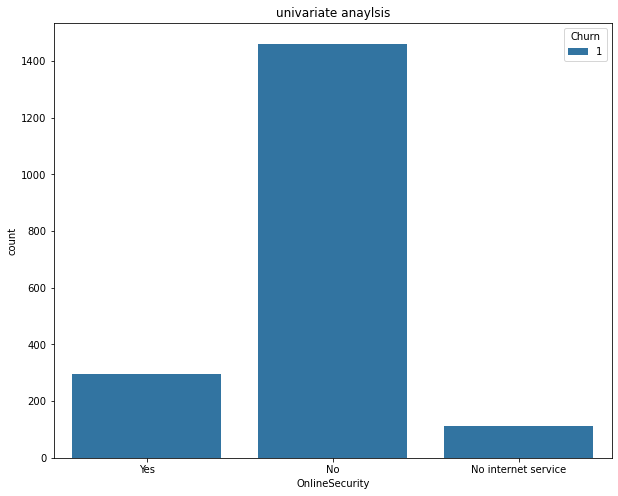

In [158]:
for i in categorical_analysis:
    plt.figure(figsize= (10,8))
    plt.title("univariate anaylsis")
    plt.xlabel(i)
    sns.countplot(i,hue= "Churn",data= inp1)
    plt.show()

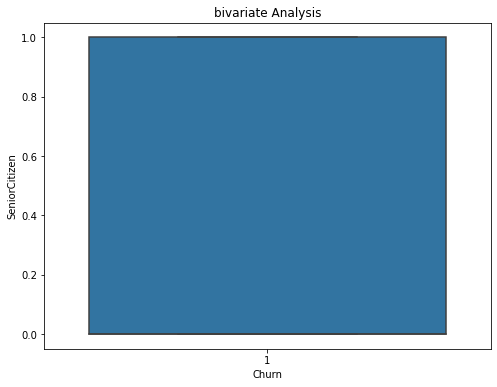

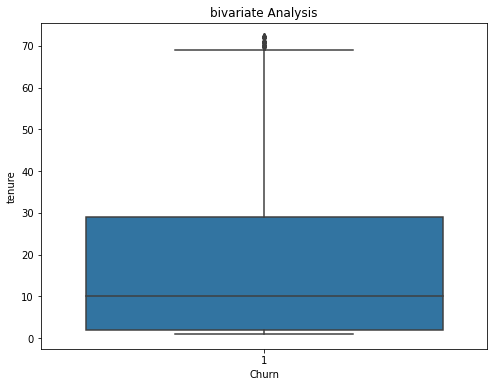

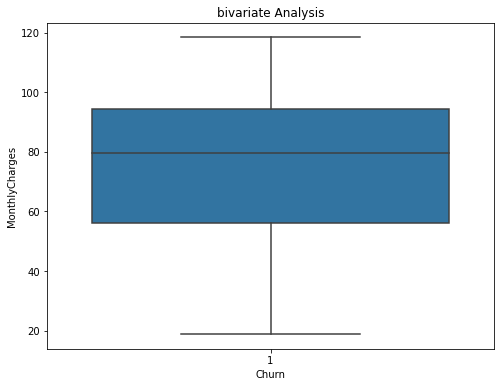

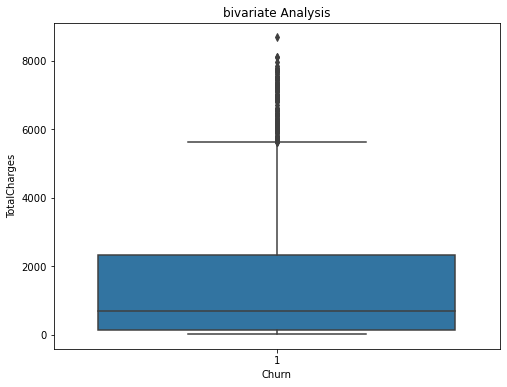

In [159]:
for i in numerical_analysis:
    plt.figure(figsize = (8, 6)) 
    plt.title("bivariate Analysis")
    plt.xlabel(i)
    sns.boxplot(x='Churn', y=i, data = inp1)
    plt.show()


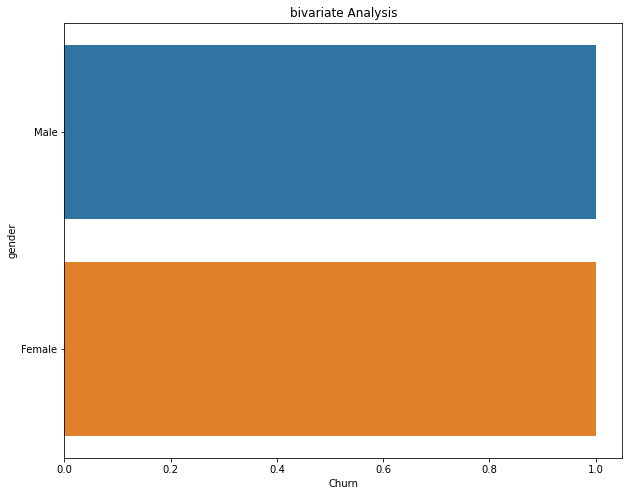

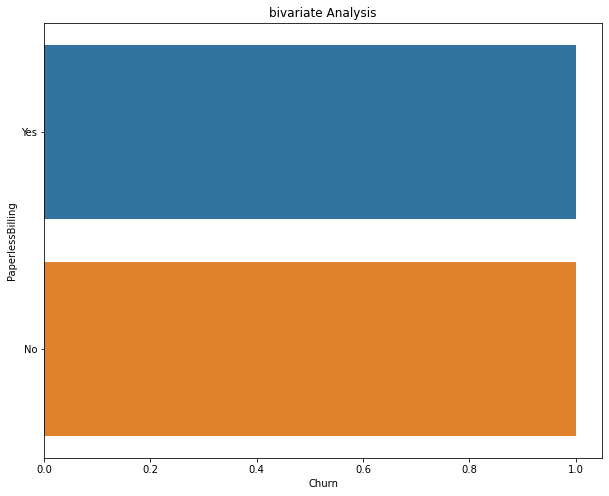

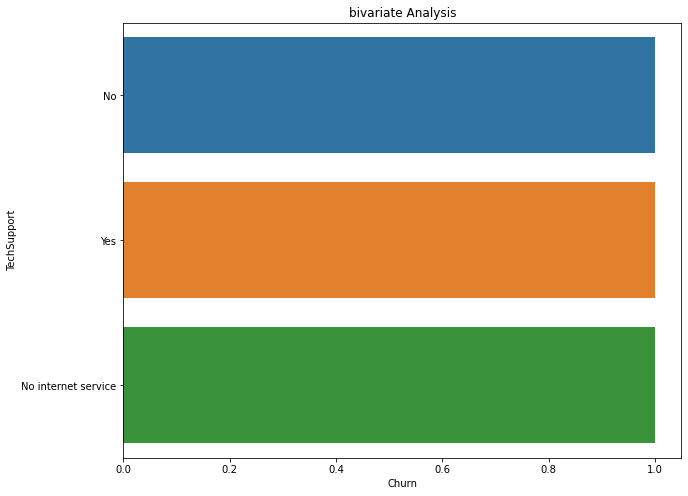

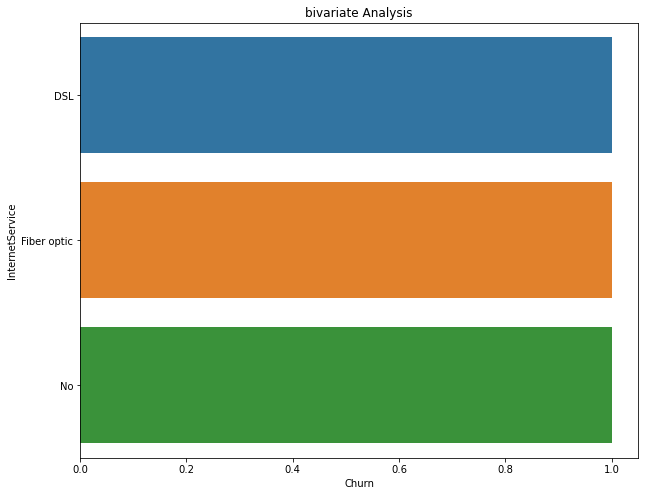

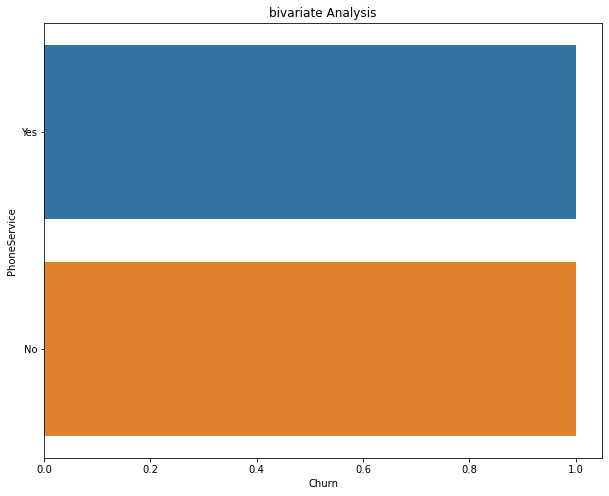

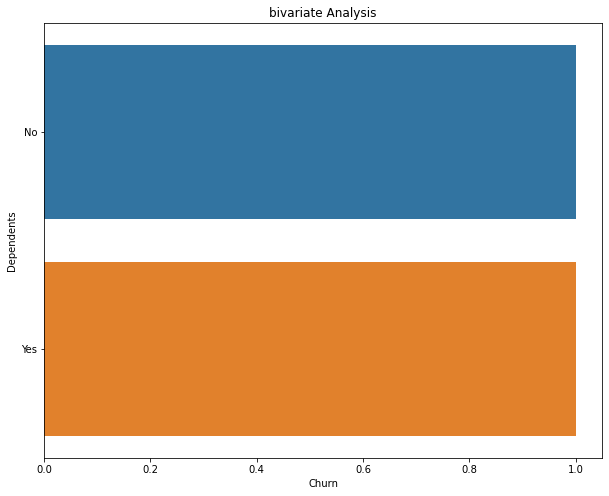

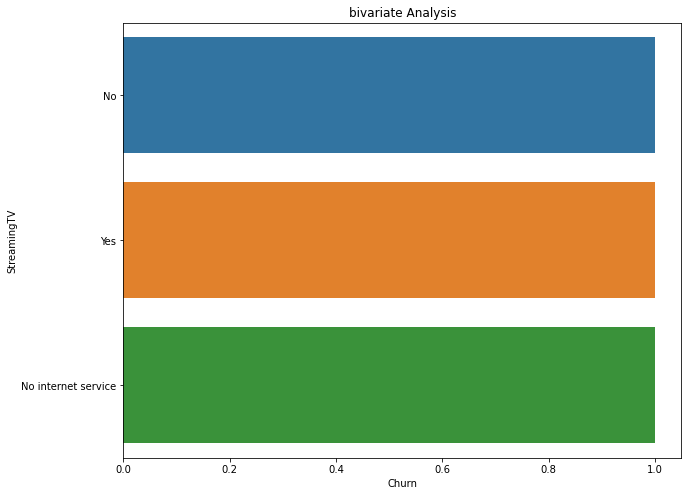

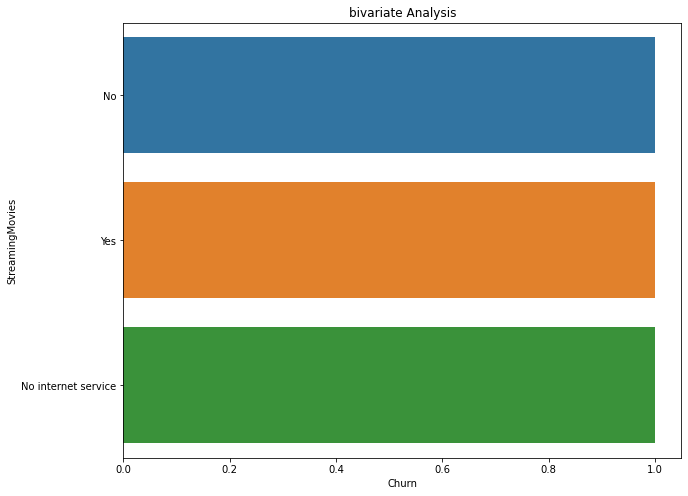

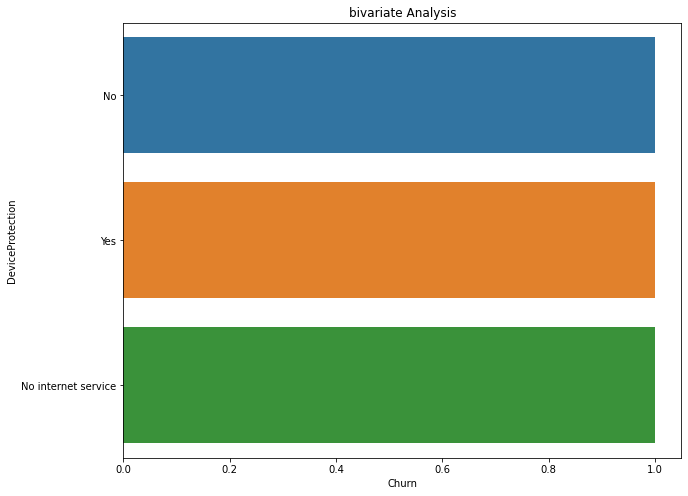

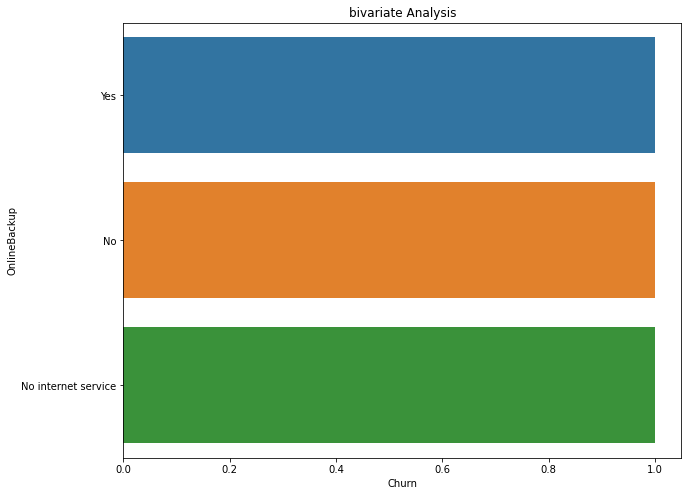

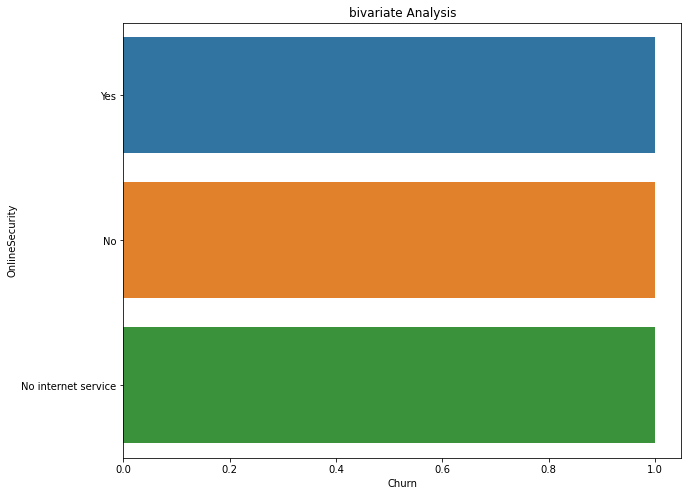

In [197]:
for i in categorical_analysis:
    plt.figure(figsize = (10, 8)) 
    plt.title("bivariate Analysis")
    plt.xlabel(i)
    sns.barplot(x='Churn', y=i, data = inp1)
    plt.show()


In [185]:
target_00=inp0[["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]].corr(method = 'pearson')

<AxesSubplot:title={'center':'Correlation Heatmap of Non Churn'}>

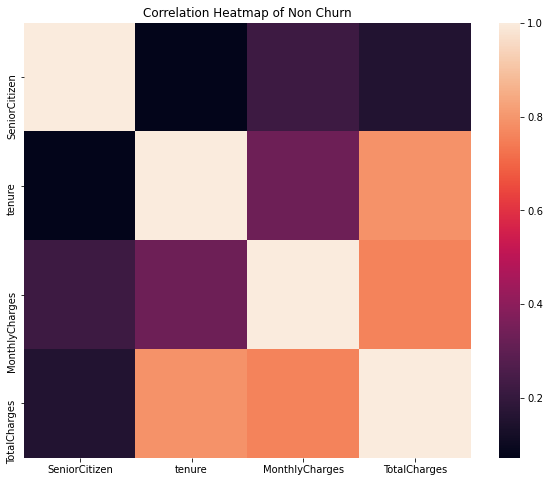

In [186]:
plt.figure(figsize= (10,8))
plt.title("Correlation Heatmap of Non Churn")
sns.heatmap(target_00)

In [183]:
target_11=inp1[["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]].corr(method = 'pearson')

<AxesSubplot:title={'center':'Correlation Heatmap of Churn'}>

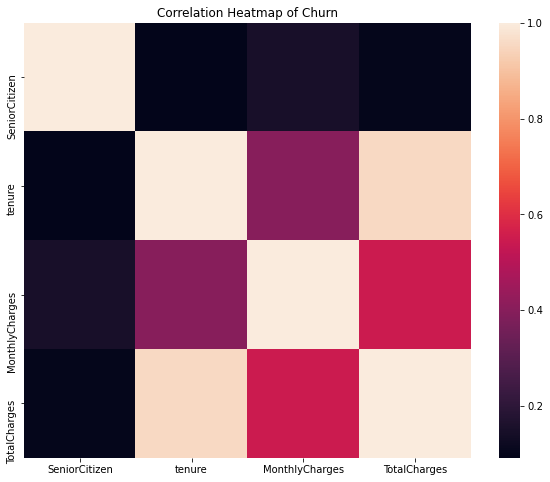

In [184]:
plt.figure(figsize= (10,8))
plt.title("Correlation Heatmap of Churn")
sns.heatmap(target_11)